In [34]:
import cv2
import numpy as np
import math
from matplotlib import pyplot as plt

In [ ]:
h = 300
w = 540
walls_map = np.zeros((h,w,1))
walls_map = cv2.rectangle(walls_map, (0,0),(w-1,h-1),255,20) #border
walls_map = cv2.rectangle(walls_map, (100,h-1),(110,100),255,-1) #obstacle 1
walls_map = cv2.rectangle(walls_map, (210,0),(220,h-1-100),255,-1)
walls_map = cv2.rectangle(walls_map,(320,0),(330,100),255,-1)
walls_map = cv2.rectangle(walls_map,(320,h-1),(330,200),255,-1)
walls_map = cv2.rectangle(walls_map, (430,h-1),(440,100),255,-1)

def show(image):
    cv2.imshow("image",image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()



In [36]:
robot_radius = 22
L = 28.7 #wheel distance
wheel_diameter = 6
r = 3.3 #wheel radius

#turn_radius = 14.35
clearance = 0
buffer = robot_radius+clearance
dt = 0.1

walls_set = set()
buffer_set = set()

walls_coord = np.where(walls_map==255)

for i in range(0,len(walls_coord[0])):
    xy = (walls_coord[1][i],walls_coord[0][i])
    walls_set.add(xy)

map_buffer = np.zeros((h,w,1))

for item in walls_set:
    map_buffer = cv2.circle(map_buffer,item,buffer,255,-1)
buffer_coord = np.where(map_buffer==255)
for i in range(0,len(buffer_coord[0])):
    xy = (buffer_coord[1][i],buffer_coord[0][i])
    if xy not in walls_set:
        buffer_set.add(xy)

map = np.zeros((h,w,3),dtype=np.uint8)
for item in walls_set:
    map[item[1],item[0]] = (255,0,0)

for item in buffer_set:
    map[item[1],item[0]] = (0,255,0)






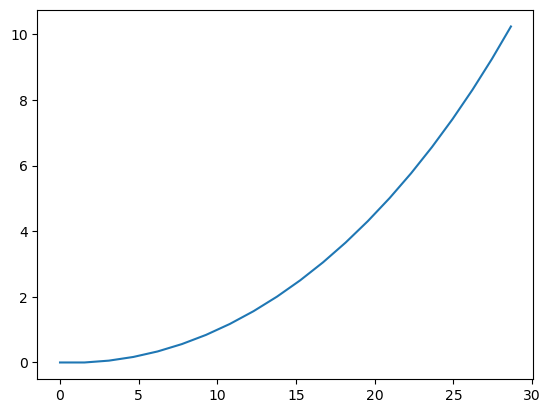

In [ ]:
pi = math.pi
def move(position,u_l,u_r):
    x,y,theta = position
    dx = (r/2)*(u_l+u_r)*np.cos(theta)*dt
    dy = (r/2)*(u_l+u_r)*np.sin(theta)*dt
    dtheta = (r/L)*(u_r-u_l)*dt
    x += dx
    y += dy
    theta += dtheta

    if theta > 2*pi:
        theta -= 2*pi
    elif theta < 0:
        theta += 2*pi
    
    return (x,y,theta)




